# Name:   Data visualization
>Purpose: 1. Scatter plot 2. Linear fit 3. Scatter matrix 4.Bar plot, stacked bar, grouped bar 5. Histogram and bin size 6. Density plot 7. Box-plot 8. QQ plot and skewness

> Author:      wangl

> Created:     10/10/2024
> Copyright:   (c) wangl 2024


## Scatter plot

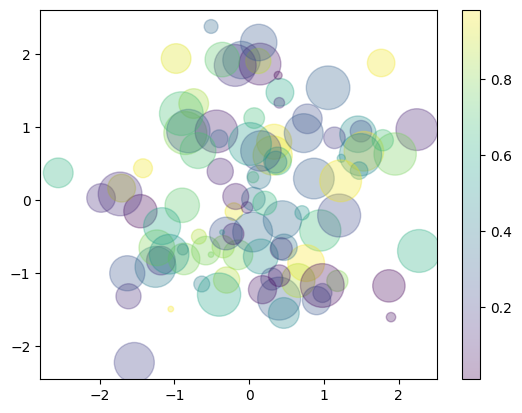

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

x = rng.randn(100)

y = rng.randn(100)

colors = rng.rand(100)

sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes,
alpha=0.3, cmap='viridis')

plt.colorbar()



## Linear fit

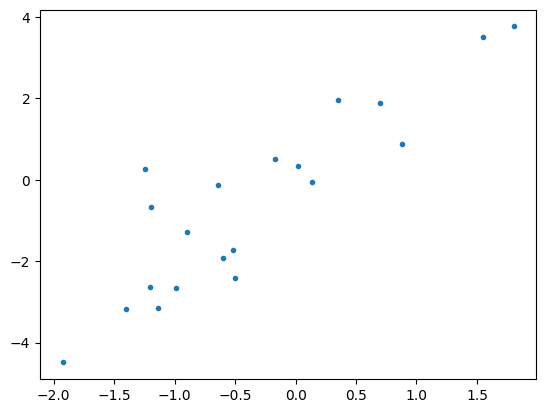

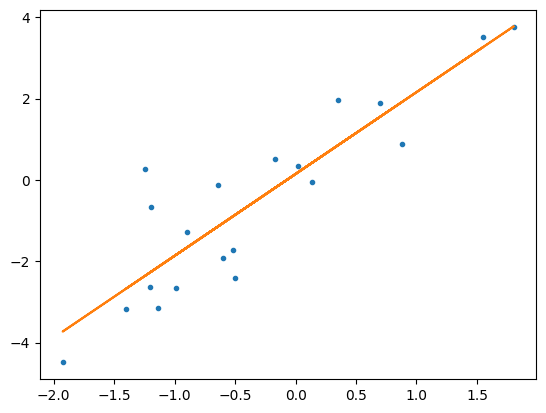

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(20)
y = 2*x + 1*np.random.randn(20)
plt.plot(x,y,'.')
x1 = np.unique(x)
y1 = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
#plt.plot(x1, y1)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

coef = np.polyfit(x,y,1)
yy = np.poly1d(coef)(x)
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,yy)

## Scatter matrix

array([[<Axes: xlabel='A', ylabel='A'>, <Axes: xlabel='B', ylabel='A'>,
        <Axes: xlabel='C', ylabel='A'>, <Axes: xlabel='D', ylabel='A'>],
       [<Axes: xlabel='A', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='C', ylabel='B'>, <Axes: xlabel='D', ylabel='B'>],
       [<Axes: xlabel='A', ylabel='C'>, <Axes: xlabel='B', ylabel='C'>,
        <Axes: xlabel='C', ylabel='C'>, <Axes: xlabel='D', ylabel='C'>],
       [<Axes: xlabel='A', ylabel='D'>, <Axes: xlabel='B', ylabel='D'>,
        <Axes: xlabel='C', ylabel='D'>, <Axes: xlabel='D', ylabel='D'>]],
      dtype=object)

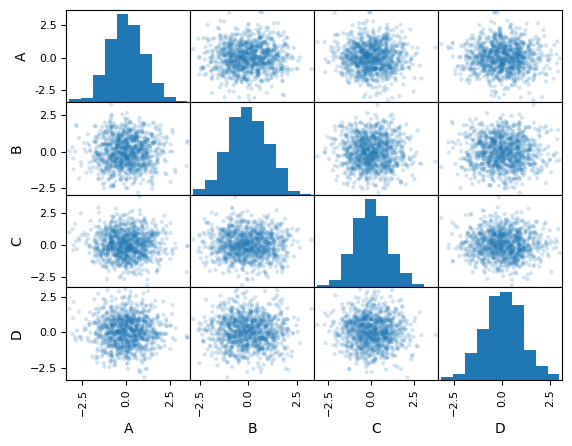

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2)


## bar plot

Text(0.5, 1.0, 'Programming language usage')

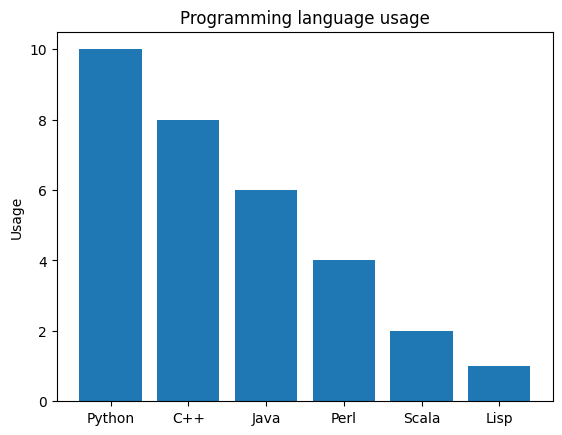

In [4]:
import matplotlib.pyplot as plt
import numpy as np
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
x_pos = np.arange(len(objects))
usage = [10, 8, 6, 4, 2, 1]
plt.bar(x_pos, usage)
plt.xticks(x_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')


## Stacked bar

(0.0, 35.0)

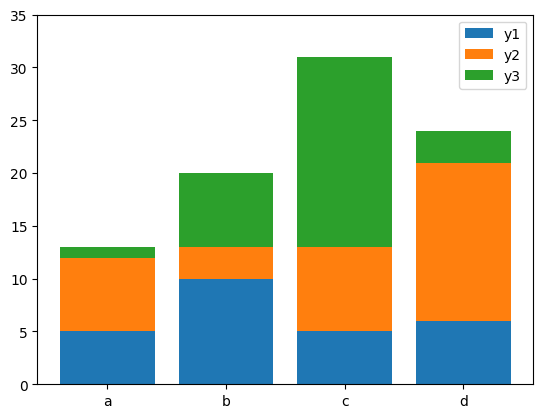

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = ['a', 'b', 'c', 'd']
y1 = [5, 10, 5, 6]
y2 = [7, 3, 8, 15]
y3 = [1, 7, 18, 3]
plt.bar(x, y1, )
plt.bar(x, y2, bottom=y1)
z = list(np.array(y1) + np.array(y2))
plt.bar(x, y3, bottom=z)
plt.legend(['y1','y2','y3'])
plt.ylim(0, 35 )




## Grouped bar

([<matplotlib.axis.XTick at 0x172b8425970>,
 [Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c'), Text(3, 0, 'd')])

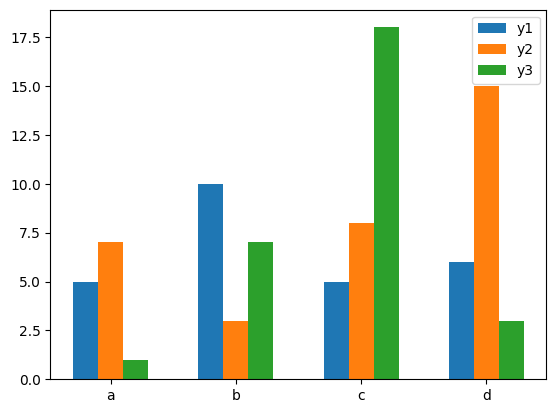

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x = ['a', 'b', 'c', 'd']
y1 = [5, 10, 5, 6]
y2 = [7, 3, 8, 15]
y3 = [1, 7, 18, 3]

w = 0.2
x_pos = np.array(range(len(x)))
plt.bar(x_pos-0.2, y1, width=w)
plt.bar(x_pos, y2, width=w)
plt.bar(x_pos+0.2, y3, width=w)
plt.legend(['y1','y2','y3'])
plt.xticks(x_pos,x)

## Pie chart

Text(0.5, 1.0, 'a')

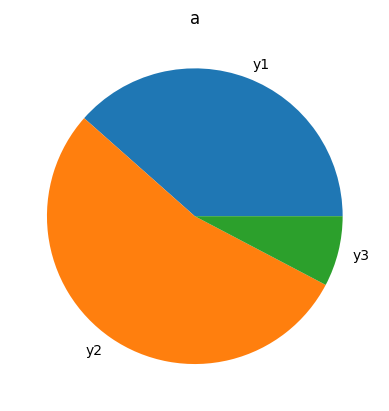

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x = ['a', 'b', 'c', 'd']
y1 = [5, 10, 5, 6]
y2 = [7, 3, 8, 15]
y3 = [1, 7, 18, 3]


za = [y1[0], y2[0], y3[0]]
plt.pie(za, labels=['y1','y2','y3'])
plt.title(x[0])



## Histogram

bin: [4.0, 23.2, 42.4, 61.599999999999994, 80.8, 100.0]
count: [10.0, 7.0, 2.0, 1.0, 1.0]


Text(0.5, 1.0, 'cumulative histogram')

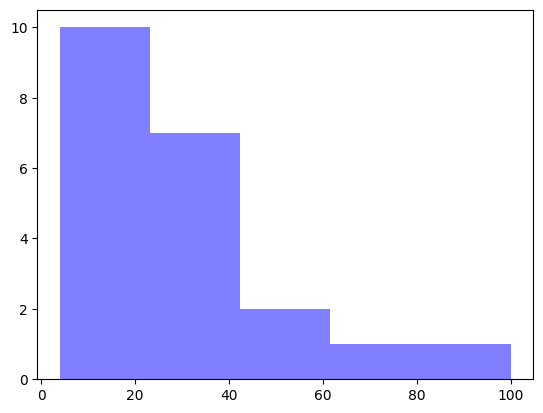

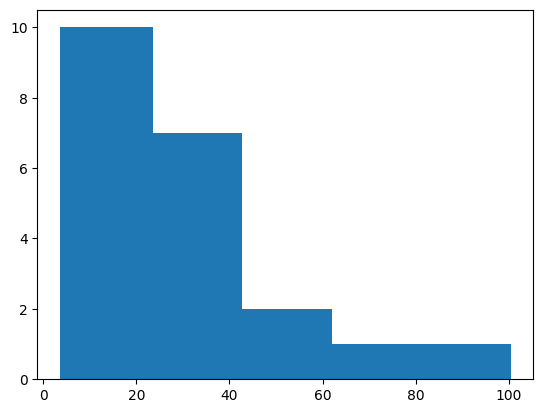

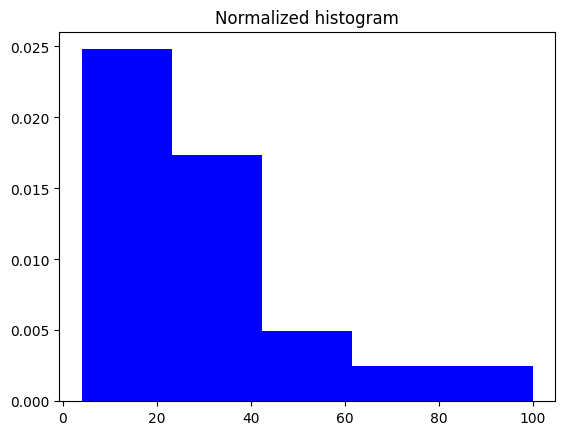

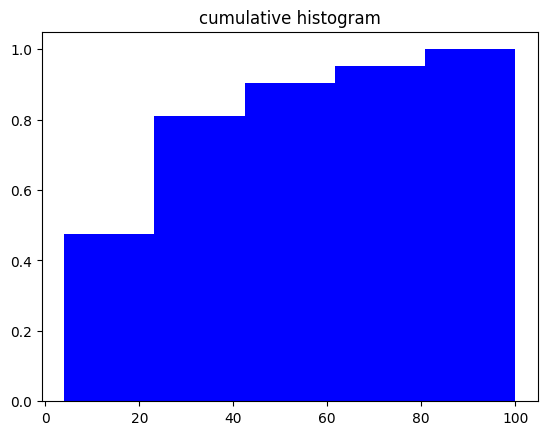

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = [21, 22, 23, 4, 5, 6, 77, 8, 9, 10, 31, 32, 33, 34, 35, 36, 37, 18, 49, 50, 100]
num_bins = 5
[count, bin, patch] = plt.hist(x, bins=num_bins, facecolor='blue', alpha=0.5)
print('bin:', [bin[i] for i in range(len(bin))])
print('count:', [count[i] for i in range(len(count))])

#bin: [4.0, 23.2, 42.4, 61.599999999999994, 80.8, 100.0]
#count: [10.0, 7.0, 2.0, 1.0, 1.0]

# you can also us np.histogram
[count2, bins2] = np.histogram(x, bins=5)
plt.figure()
plt.bar((bins2[0:-1]+bins2[1:])/2,count2,width=20)

plt.figure()
plt.hist(x, bins=num_bins, facecolor='blue', density=1)
plt.title('Normalized histogram')

plt.figure()
plt.hist(x, bins=num_bins, facecolor='blue', density=1, cumulative=True)
plt.title('cumulative histogram')

## histogram with different number of bins

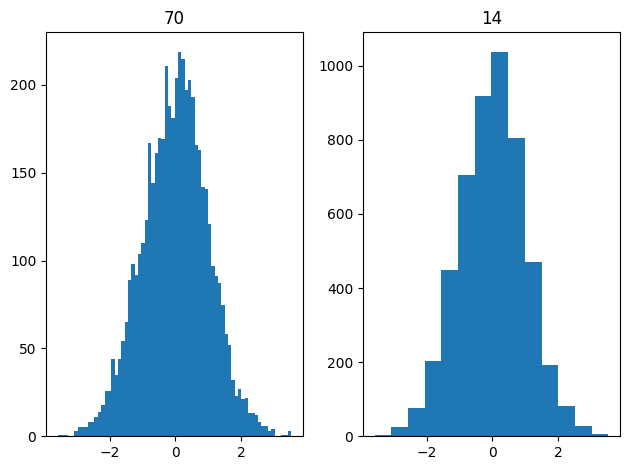

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(5000)
plt.subplot(121)
num_bins = int(np.sqrt(len(x)))
plt.hist(x,num_bins)
plt.title(num_bins)
plt.subplot(122)
num_bins = int(np.ceil(np.log2(len(x))+1))
plt.hist(x,num_bins)
plt.title(num_bins)
plt.tight_layout()


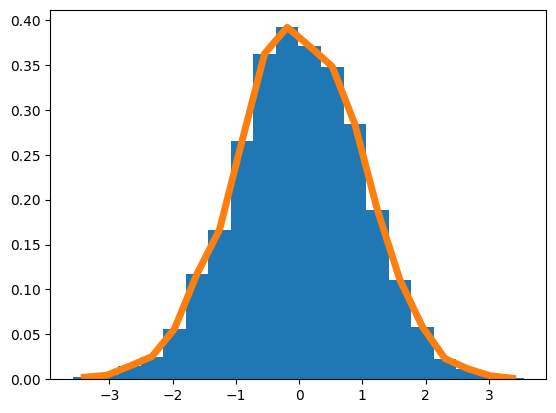

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(5000)
hist, bins, path = plt.hist(x,bins=20, density=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist, linewidth=5)


## Density plot

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\703162919.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delay, bins = 18, hist = True, kde = False,
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\703162919.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delay, bins = 18, hist = T

Text(0.5, 1.0, 'Density plot with varying bandwidth')

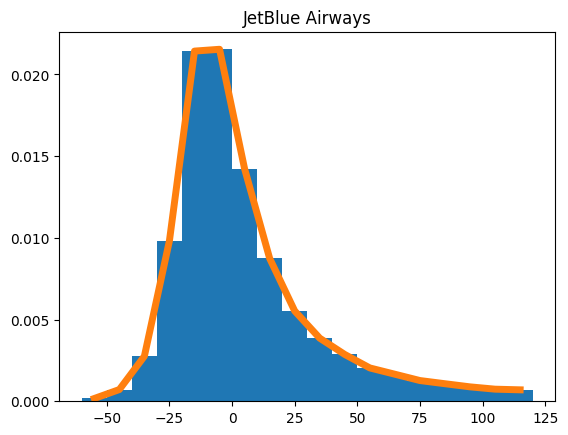

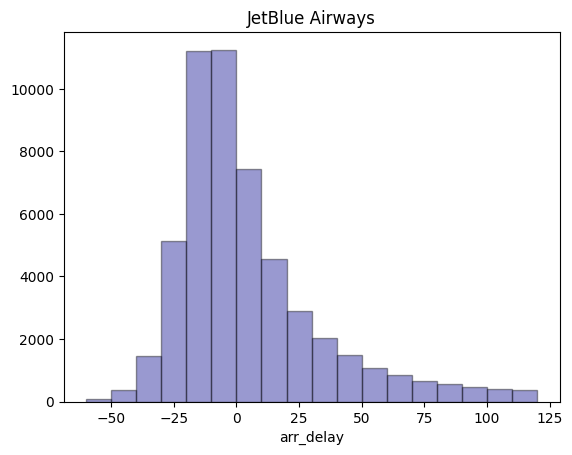

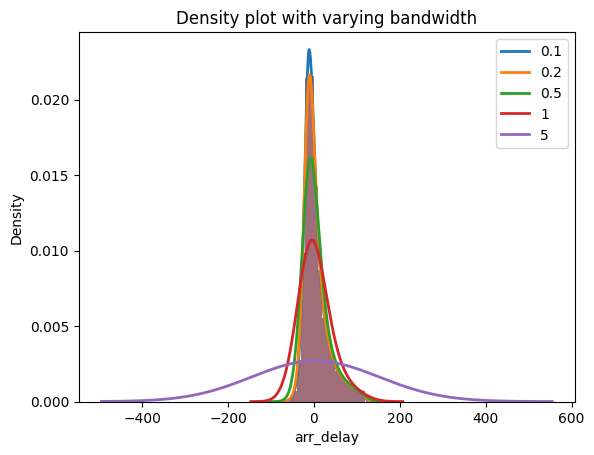

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
flights = pd.read_csv("http://www.eecs.qmul.ac.uk/~linwang/download/ecs764/formatted_flights.csv")
flights.head(10)
JetBlue = flights[flights['name']=='JetBlue Airways']
delay = JetBlue['arr_delay']
hist, bins, path = plt.hist(delay,bins=18, density=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist, linewidth=5)
plt.title('JetBlue Airways')

# seaborn
import seaborn as sns
plt.figure()
sns.distplot(delay, bins = 18, hist = True, kde = False,
             color = 'darkblue',
             kde_kws={'linewidth': 5},
             hist_kws={'edgecolor': 'black'})
plt.title('JetBlue Airways')

# kernal density estimation
plt.figure()
bw_list = [0.1, 0.2, 0.5, 1, 5]
for b in bw_list:
  sns.distplot(delay, bins = 18, hist = True, kde = True,
             kde_kws={'linewidth': 2, 'bw': b})
plt.legend(bw_list)
plt.title('Density plot with varying bandwidth')




## Box plot

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1640995881.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airline, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1640995881.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airline, hist=False

Text(0, 0.5, 'Delay')

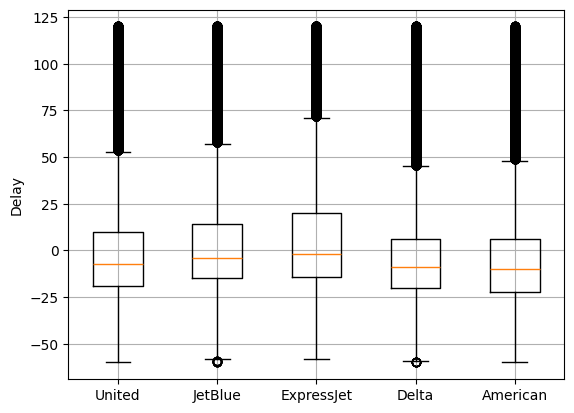

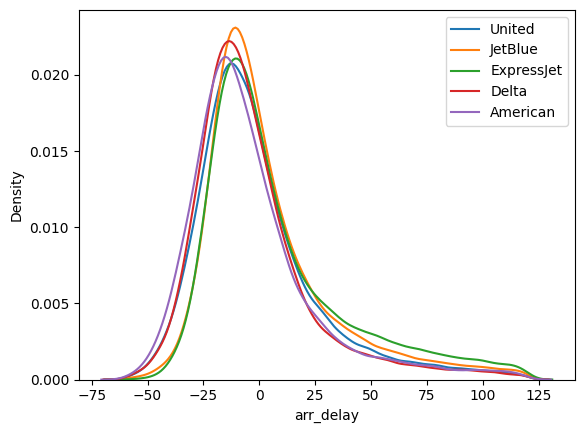

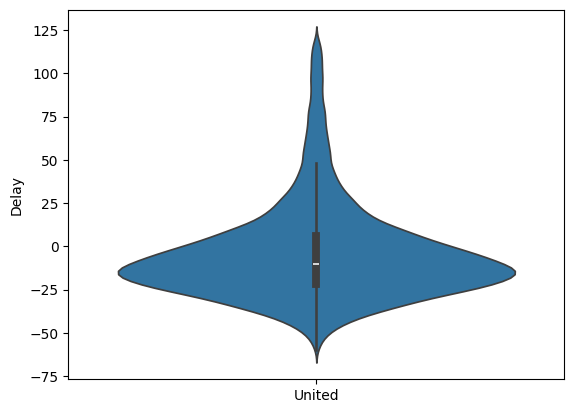

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
flights = pd.read_csv("http://www.eecs.qmul.ac.uk/~linwang/download/ecs764/formatted_flights.csv")
flights.head(10)
JetBlue = flights[flights['name']=='JetBlue Airways']['arr_delay']
Delta = flights[flights['name']=='Delta Air Lines Inc.']['arr_delay']
United = flights[flights['name']=='United Air Lines Inc.']['arr_delay']
American = flights[flights['name']=='American Airlines Inc.']['arr_delay']
ExpressJet = flights[flights['name']=='ExpressJet Airlines Inc.']['arr_delay']

# box plot
delay = [United, JetBlue, ExpressJet, Delta, American]
flierprops = dict(marker='+', markerfacecolor='g', markersize=5,
                  linestyle='none', markeredgecolor='r')
airline_names = ['United', 'JetBlue', 'ExpressJet', 'Delta', 'American']
plt.boxplot(delay,labels=airline_names)
plt.ylabel('Delay')
plt.grid()

# pdf plot
import seaborn as sns
plt.figure()
for airline in delay:
  sns.distplot(airline, hist=False, kde=True)
plt.legend(airline_names)

# violin plot
plt.figure()
ax = sns.violinplot(data=delay)
ax.set_xticklabels(airline_names)
ax.set_ylabel('Delay')




## Q-Q plot

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1743046226.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1743046226.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, hist=True, kde= True, hist_kw

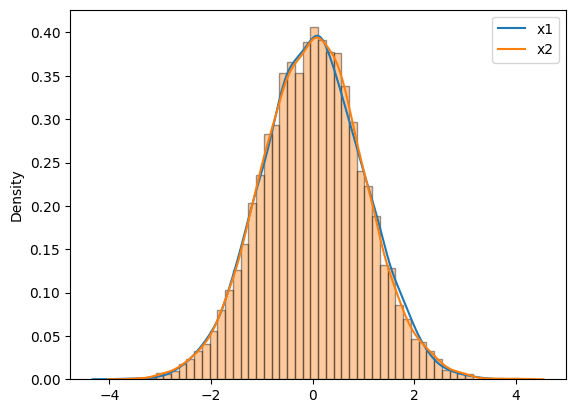

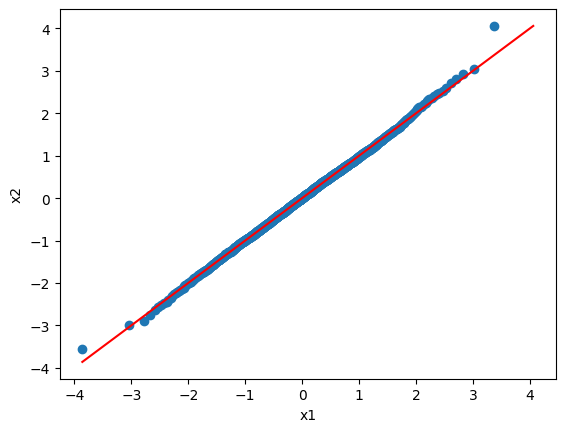

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1743046226.py:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1743046226.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, hist=True, kde= True, hist_kw

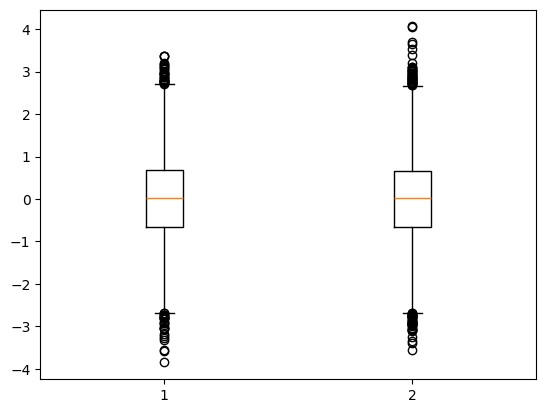

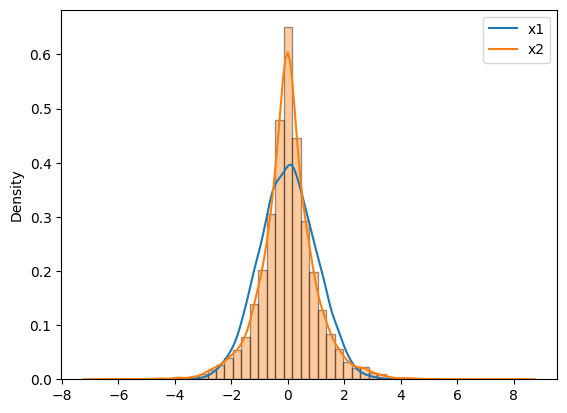

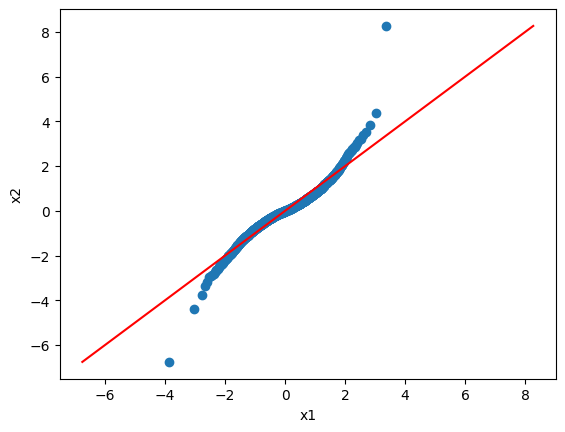

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1743046226.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\1743046226.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, hist=True, kde= True, hist_kw

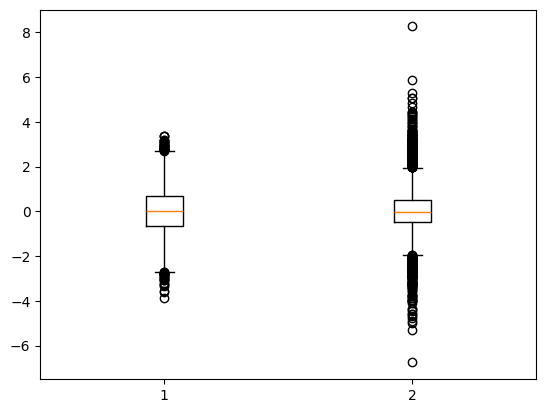

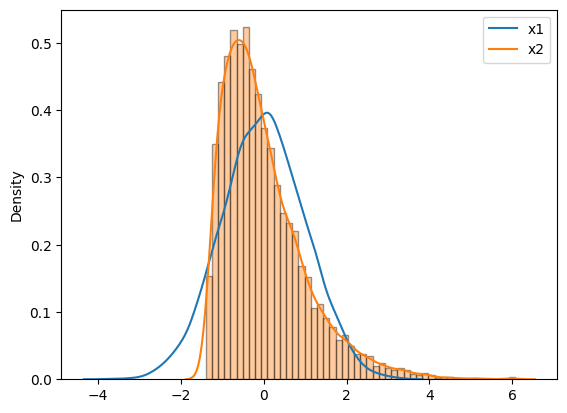

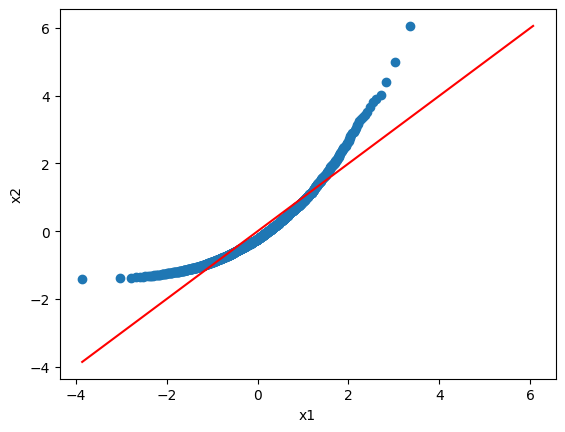

{'whiskers': [<matplotlib.lines.Line2D at 0x172bafa6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x172baf1e030>,
 'boxes': [<matplotlib.lines.Line2D at 0x172bafa6960>,
 'medians': [<matplotlib.lines.Line2D at 0x172baf1fef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x172baf1dbb0>,
 'means': []}

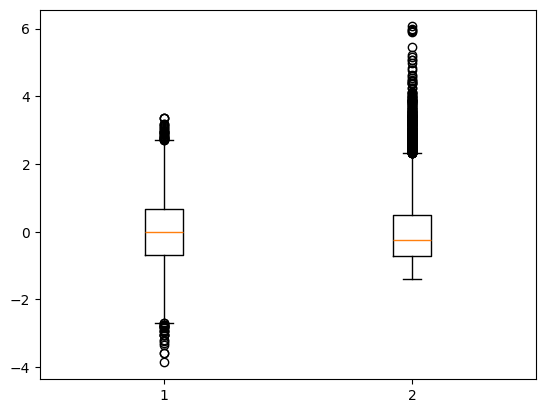

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def standardize(observation):
  z = (observation-np.mean(observation))/np.std(observation)
  return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles

def pyqqplot(data1, data2):
    plt.figure()
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))
    plt.scatter(q1, q2 )

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    plt.plot([minim, maxim], [minim, maxim], 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

import seaborn as sns

x1 = np.random.normal(0, 1, size = 10000 )
x2 = np.random.normal(0, 1, size=10000 )
plt.figure()
sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=True, kde= True, hist_kws={'edgecolor': 'black'})
plt.legend(['x1','x2'])
pyqqplot(x1, x2)
plt.figure()
plt.boxplot([x1,x2])

x2 = np.random.laplace(0, 5, size = 10000 )
x1 = standardize(x1)
x2 = standardize(x2)
plt.figure()
sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=True, kde= True, hist_kws={'edgecolor': 'black'})
plt.legend(['x1','x2'])
pyqqplot(x1,x2)
plt.figure()
plt.boxplot([x1,x2])

x2 = np.random.gamma(2, 1, size=10000 )
x1 = standardize(x1)
x2 = standardize(x2)
plt.figure()
sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=True, kde= True, hist_kws={'edgecolor': 'black'})
plt.legend(['x1','x2'])
pyqqplot(x1,x2)
plt.figure()
plt.boxplot([x1,x2])




## Find skewness with QQ plot

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, hist=True, kde= True, hist_kws=

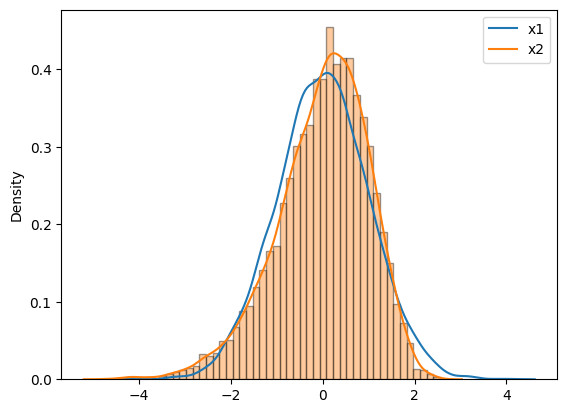

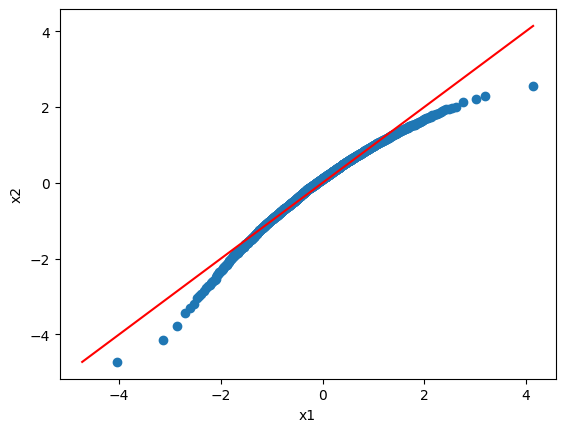

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, hist=True, kde= True, hist_kws=

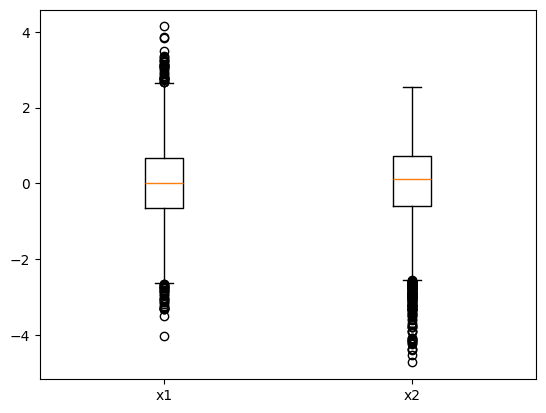

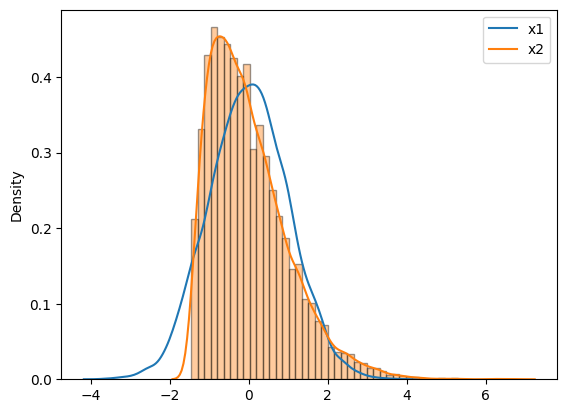

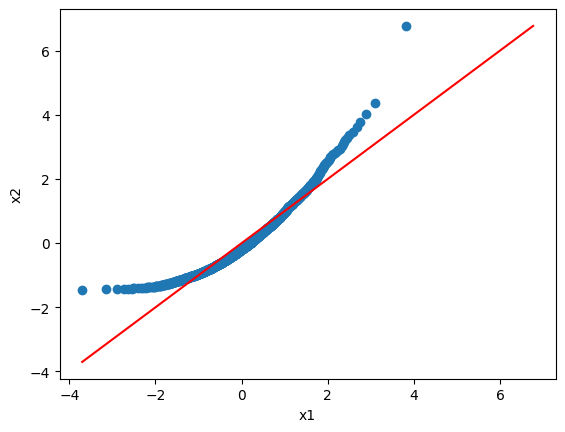

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:64: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:65: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, hist=True, kde= True, hist_kws=

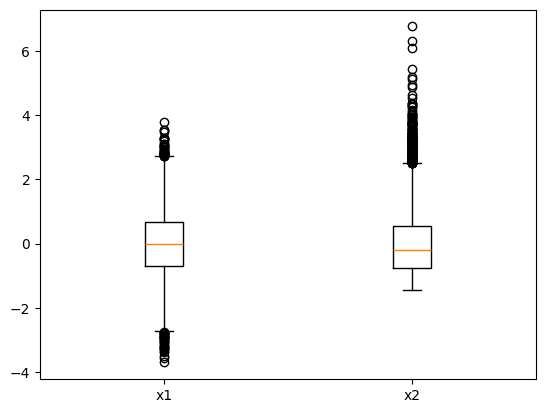

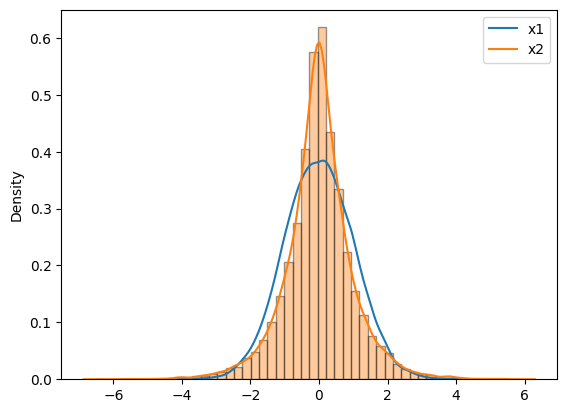

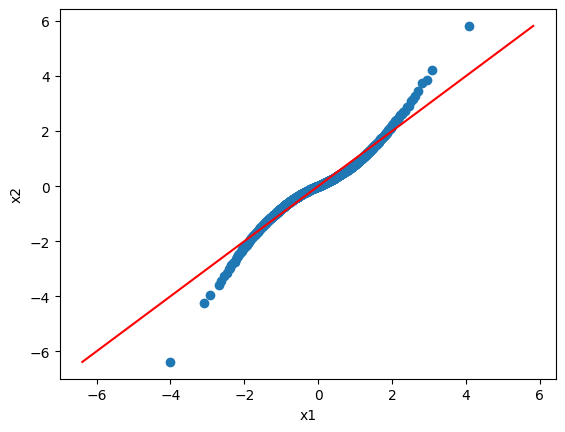

C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=False, kde=True)
C:\Users\banta\AppData\Local\Temp\ipykernel_42220\808906380.py:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, hist=True, kde= True, hist_kws=

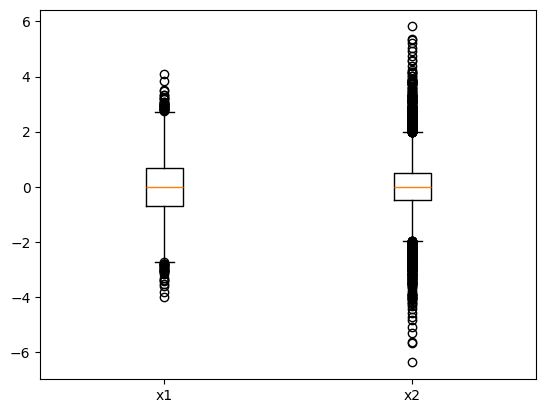

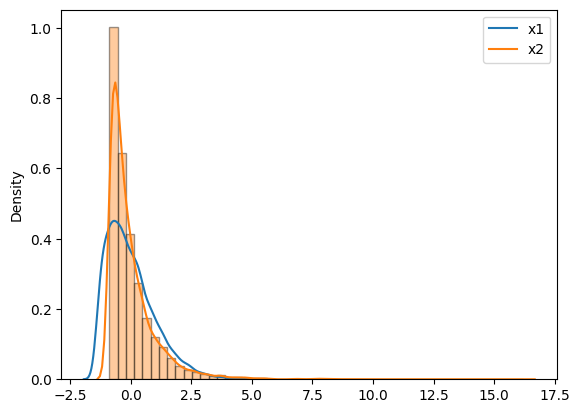

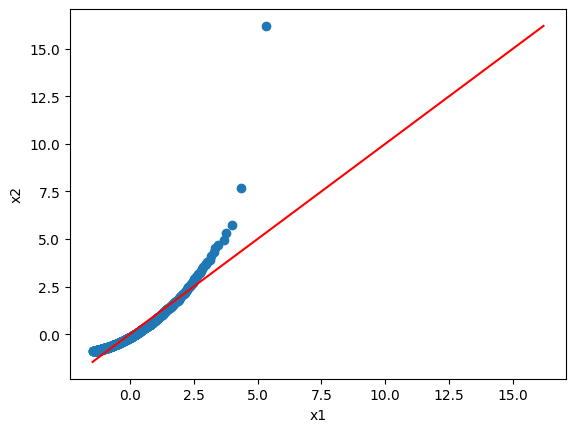

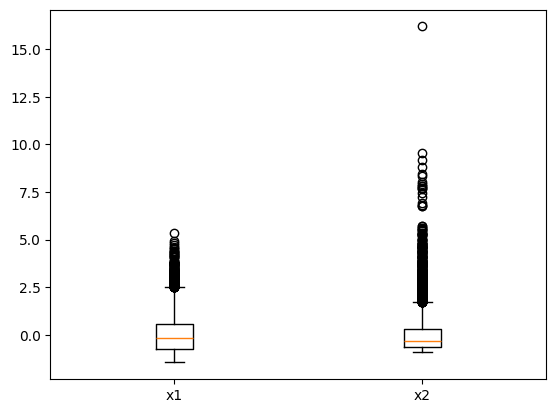

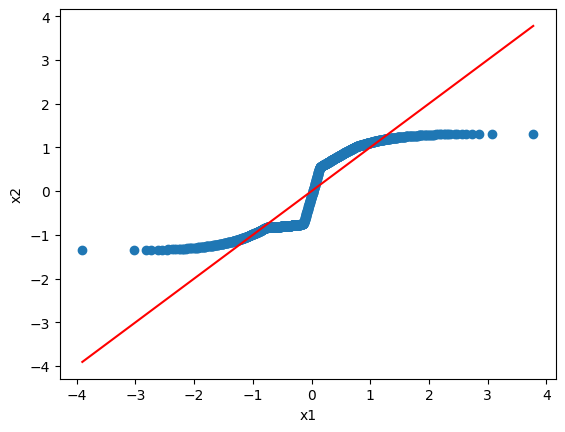

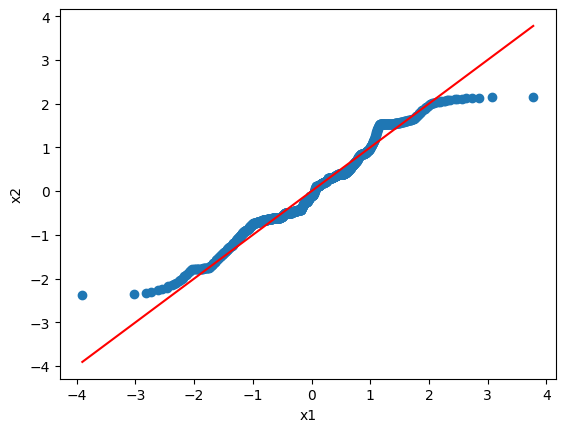

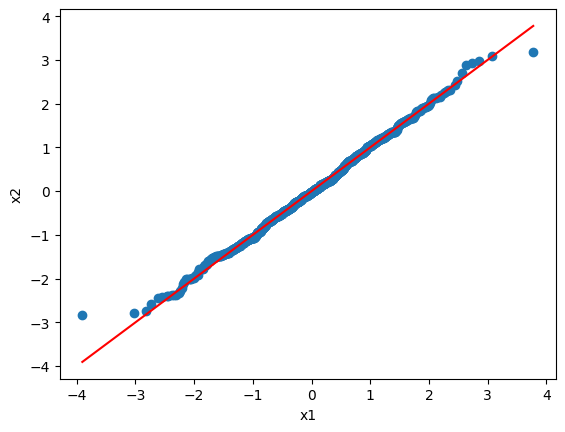

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def standardize(observation):
  z = (observation-np.mean(observation))/np.std(observation)
  return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles

def pyqqplot(data1, data2):
    plt.figure()
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))
    plt.scatter(q1, q2 )

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    plt.plot([minim, maxim], [minim, maxim], 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

import seaborn as sns

# left skewed
x1 = np.random.normal(0, 1, size = 10000 )
x2 = np.random.weibull(10,size=10000)
x1 = standardize(x1)
x2 = standardize(x2)
plt.figure()
sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=True, kde= True, hist_kws={'edgecolor': 'black'})
plt.legend(['x1','x2'])
pyqqplot(x1,x2)
plt.figure()
plt.boxplot([x1,x2],labels=['x1','x2'])

# right skewed
x1 = np.random.normal(0, 1, size = 10000 )
x2 = np.random.weibull(1.5,size=10000)
x1 = standardize(x1)
x2 = standardize(x2)
plt.figure()
sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=True, kde= True, hist_kws={'edgecolor': 'black'})
plt.legend(['x1','x2'])
pyqqplot(x1,x2)
plt.figure()
plt.boxplot([x1,x2],labels=['x1','x2'])

# fat tail
x1 = np.random.normal(0, 1, size = 10000 )
x2 = np.random.laplace(0, 5, size = 10000 )
x1 = standardize(x1)
x2 = standardize(x2)
plt.figure()
sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=True, kde= True, hist_kws={'edgecolor': 'black'})
plt.legend(['x1','x2'])
pyqqplot(x1,x2)
plt.figure()
plt.boxplot([x1,x2],labels=['x1','x2'])

# extreme vs heavy-tail
x1 = np.random.weibull(1.5,size=10000)
x2 = np.random.pareto(10, size=10000 )
x1 = standardize(x1)
x2 = standardize(x2)
plt.figure()
sns.distplot(x1, hist=False, kde=True)
sns.distplot(x2, hist=True, kde= True, hist_kws={'edgecolor': 'black'})
plt.legend(['x1','x2'])
pyqqplot(x1,x2)
plt.figure()
plt.boxplot([x1,x2],labels=['x1','x2'])

# impact of smaple size
x1 = np.random.normal(0, 1, size = 10000 )
x2 = np.random.normal(0, 1, size = 10 )
x3 = np.random.normal(0, 1, size=50)
x4 = np.random.normal(0, 1, size=500)
pyqqplot(x1,x2)
pyqqplot(x1,x3)
pyqqplot(x1,x4)